In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
train_df = pd.read_csv("../data/ais_train.csv", sep="|")
ports_df = pd.read_csv("../data/ports.csv", sep="|")
train_df.tail()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
1522060,2024-05-07 23:59:07,359.1,13.4,0,1,0,05-08 05:00,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417
1522061,2024-05-07 23:59:08,12.3,17.1,0,13,0,05-10 03:00,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1
1522062,2024-05-07 23:59:08,269.8,14.9,-1,270,0,05-15 23:00,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b
1522063,2024-05-07 23:59:08,8.0,18.7,0,6,0,05-08 12:45,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b
1522064,2024-05-07 23:59:08,336.0,14.3,5,337,0,05-07 23:00,38.98635,-75.13275,62080cff66fc0a8e43c6123a,61d38528b7b7526e1adf3e6f


In [3]:
MAP_LAND_PATH = "../data/land_and_ocean/ne_10m_land.zip"  # Path to the land zip file
MAP_OCEAN_PATH = "../data/land_and_ocean/ne_10m_ocean.zip"  # Path to the ocean zip file
land_world = gpd.read_file(MAP_LAND_PATH)
ocean_world = gpd.read_file(MAP_OCEAN_PATH)

In [61]:
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(train_df.query("navstat != 5")[["longitude", "latitude"]])

KMeans(n_clusters=13, random_state=42)

In [58]:
from sklearn.metrics.pairwise import rbf_kernel

In [66]:
cluster_similarities = rbf_kernel(
    train_df[["longitude", "latitude"]], kmeans.cluster_centers_, gamma=0.005
)
train_df["max_similarity"] = cluster_similarities.max(axis=1)

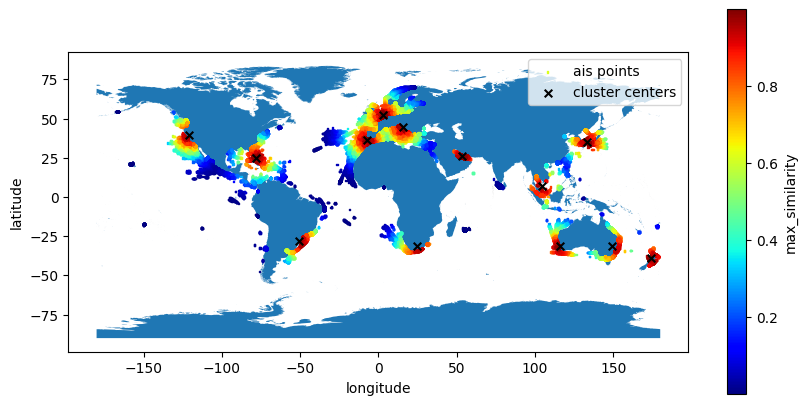

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
land_world.plot(ax=ax)
train_df.plot.scatter(
    "longitude",
    "latitude",
    marker=",",
    c="max_similarity",
    cmap="jet",
    s=1,
    ax=ax,
    label="ais points",
    sharex=False,
    colorbar=True,
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="x",
    s=30,
    c="black",
    label="cluster centers",
)
plt.legend()
plt.show()